In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

We define the functions for each cycle using http://www.karlsims.com/rd.html

In [68]:
def actualizaImagen(imgA, imgB):  
    newA = np.zeros(imgA.shape)
    newB = np.zeros(imgA.shape)
    for i in range(imgA.shape[0]-1):
        for j in range(imgA.shape[1]-1):
            newA[i][j] = A[i][j] + laplacianA(i,j, imgA) - A[i][j] * B[i][j]**2 + 0.055*(1-A[i][j])
            newB[i][j] = B[i][j] + 0.5*laplacianB(i,j, imgB) +  A[i][j] * B[i][j]**2 - 0.1*B[i][j]
    return (newA, newB)

def laplacianA(x,y, imgActual):
    nuevo = -1*imgActual[x][y]
    nuevo += imgActual[x-1][y-1]*0.2
    nuevo += imgActual[x-1][y+1]*0.2
    nuevo += imgActual[x+1][y-1]*0.2
    nuevo += imgActual[x+1][y+1]*0.2    
    nuevo += imgActual[x][y+1]*0.5
    nuevo += imgActual[x][y-1]*0.5
    nuevo += imgActual[x+1][y]*0.5
    nuevo += imgActual[x-1][y]*0.5
    return nuevo

def laplacianB(x,y, imgActual):
    nuevo = -1*imgActual[x][y]
    nuevo += imgActual[x-1][y-1]*0.2
    nuevo += imgActual[x-1][y+1]*0.2
    nuevo += imgActual[x+1][y-1]*0.2
    nuevo += imgActual[x+1][y+1]*0.2    
    nuevo += imgActual[x][y+1]*0.5
    nuevo += imgActual[x][y-1]*0.5
    nuevo += imgActual[x+1][y]*0.5
    nuevo += imgActual[x-1][y]*0.5
    return nuevo

We iterate and plot the chemical B

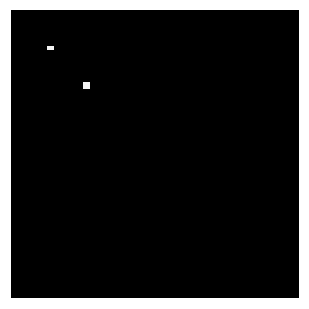

In [74]:
A = np.ones((80,80))

B = np.zeros(A.shape)
B[10][10]=1
B[10][11]=1

B[20][20]=1
B[20][21]=1
B[21][20]=1
B[21][21]=1

A = A - B

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
im = ax.imshow(B, cmap=plt.cm.binary, interpolation='nearest')
im.set_clim(-0.05, 1)

def init():
    im.set_data(A)
    return (im,)

def animate(i):
    im.set_data(animate.B)
    animate.A, animate.B =actualizaImagen(animate.A, animate.B)
    return (im,)
animate.A = A
animate.B = B

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=100)

HTML(anim.to_jshtml())

In [56]:
class celda:
    def __init__(self, a, b):
        self.a = 0
        self.b = 0

vcell = np.vectorize(celda)
init_arry_a = np.arange(9).reshape((3,3))
init_arry_b = np.arange(9).reshape((3,3))

morph = np.empty((3,3), dtype=object)
morph[:,:] = vcell(init_arry_a, init_arry_b)

print(morph[1,1].b)

0
